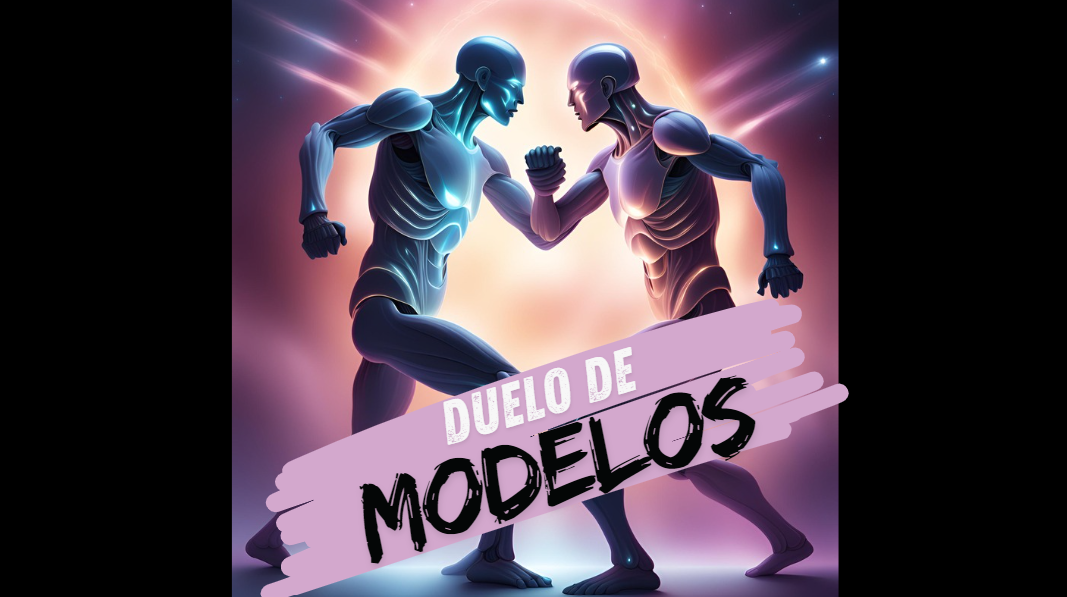

# O duelo entre modelos:

Em ciência de dados, aprendemos diversos tipos de modelos e técnicas para
resolver problemas complexos. No entanto, no dia a dia, escolher o modelo ideal sem testar pode ser desafiador. Por isso, é fundamental para o cientista de dados testar diferentes modelos para o mesmo problema, a fim de identificar qual algoritmo se adequa melhor aos dados específicos. Ferramentas de machine learning, como o Amazon SageMaker e Google Cloud AI Platform facilitam esse processo, automatizando a comparação e avaliação de múltiplos modelos. Este procedimento de teste e validação é uma prática comum e essencial para garantir que utilizamos a abordagem mais eficiente e precisa. Durante esta aula, vamos explorar essa dinâmica, comparando a regressão logística e a árvore de decisão em uma mesma base de dados binária, analisando suas performances e compreendendo suas diferenças e aplicações práticas.

# Dinâmica da aula:
Durante esta aula, vamos explorar essa dinâmica, comparando a regressão logística e a árvore de decisão para resolver um problema de classificação. Ao final, vamos analisar os resultados para entender os principais fatores que podem ter impactado o desempenho do modelo vencedor. É importante lembrar que o fato de um modelo se sair melhor que o outro nessa análise não significa que ele é sempre superior, mas sim que, para esses dados específicos, ele apresentou melhor performance.

# Conhecendo nossos campeões:

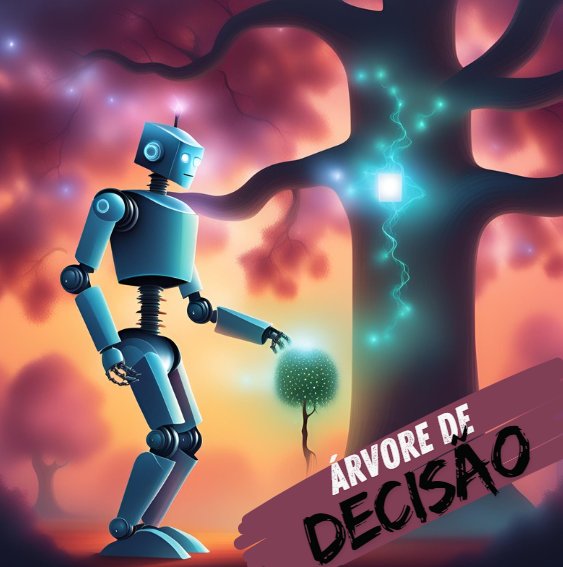

Vamos começar nosso duelo de modelos apresentando a Árvore de Decisão. Este algoritmo, que surgiu na década de 1980, é uma técnica um pouco mais recente em comparação com a Regressão Logística, que tem suas raízes no século XIX. Vamos relembrar brevemente a base da Árvore de Decisão: este modelo funciona dividindo repetidamente os dados em subconjuntos, com base em uma série de condições. Isso resulta em uma estrutura hierárquica de decisões que se assemelha a uma árvore, onde cada nó interno representa uma "pergunta" sobre uma característica, e cada folha representa um rótulo de classe ou um valor de saída.

# **Pontos Fortes da Árvore de Decisão**

**Interpretação Simples:** As árvores de decisão são fáceis de entender e interpretar. A lógica por trás das decisões é transparente e pode ser facilmente visualizada.

**Capacidade de Capturar Interações Não Lineares**: Ao contrário de modelos lineares, as árvores de decisão podem capturar interações complexas e não lineares entre variáveis.

**Necessidade Mínima de Pré-processamento de Dados:** Elas não requerem uma extensa normalização ou padronização dos dados.

**Versatilidade:** Podem ser usadas tanto para problemas de classificação quanto de regressão.

# **Pontos Fracos da Árvore de Decisão**

**Propensão ao Overfitting:** As árvores de decisão podem se ajustar excessivamente aos dados de treinamento, especialmente se não forem podadas corretamente.

**Sensibilidade às Pequenas Variações nos Dados:** Pequenas mudanças nos dados podem resultar em uma árvore completamente diferente.

**Desempenho em Dados Complexos:** Em conjuntos de dados com muitas características irrelevantes ou ruidosas, as árvores de decisão podem não performar tão bem quanto outros modelos.

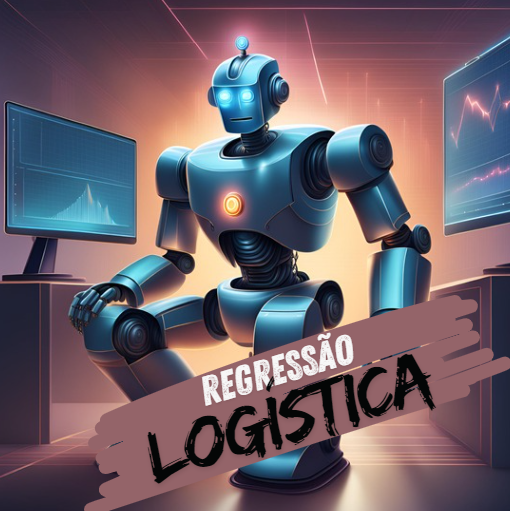

Vamos agora apresentar nosso segundo campeão, a Regressão Logística. Este método tem suas raízes no século XIX e é um dos métodos estatísticos mais antigos utilizados em problemas de classificação. A base da Regressão Logística é modelar a probabilidade de uma variável dependente binária (ou categórica) em função de uma ou mais variáveis independentes, utilizando a função logística, que mapeia qualquer valor real para o intervalo (0, 1).

# **Pontos Fortes da Regressão Logística**

**Interpretação Clara:** A Regressão Logística fornece coeficientes que indicam a direção e a magnitude do impacto das variáveis independentes sobre a probabilidade do resultado.

**Robustez em Dados Lineares:** Funciona muito bem quando há uma relação linear entre as variáveis independentes e a logit (log-odds) da variável dependente.

**Eficiência Computacional:** É menos propensa ao overfitting em comparação com modelos mais complexos, especialmente com regularização adequada.

**Base Estatística Sólida**: Baseada em teorias estatísticas bem estabelecidas, tornando-a uma escolha confiável e bem compreendida.

# **Pontos Fracos da Regressão Logística**


**Limitações em Relações Não Lineares:** Tem dificuldades em capturar relações não lineares complexas entre variáveis.


**Necessidade de Pré-processamento:** Requer normalização ou padronização das variáveis, especialmente quando há variáveis de diferentes escalas.


**Assumptions Estritas**: Supõe que as variáveis independentes não são altamente correlacionadas (colinearidade), o que pode não ser sempre o caso.

# Arena do duelo (Nossa base de dados):

Para nosso duelo entre a Árvore de Decisão e a Regressão Logística, utilizaremos a famosa base de dados do Titanic. Esta base de dados é amplamente utilizada em competições e desafios de machine learning devido à sua simplicidade e ao fato de ser um problema de classificação binária claro: prever se um passageiro sobreviveu ou não ao naufrágio do Titanic, com base em características como idade, gênero, classe do bilhete, entre outras.

Existem diversos campeonatos e competições, como os realizados na plataforma Kaggle, onde cientistas de dados e entusiastas competem para entregar os melhores modelos preditivos utilizando esta base de dados. Esses campeonatos são excelentes oportunidades para praticar e melhorar habilidades em machine learning, além de permitir a comparação de diferentes abordagens e algoritmos.

Neste duelo, vamos aplicar tanto a Árvore de Decisão quanto a Regressão Logística à base de dados do Titanic, analisar seus desempenhos e tentar entender os principais fatores que influenciaram os resultados de cada modelo. Lembrando que o modelo vencedor não será necessariamente o melhor em todas as situações, mas sim o que melhor se adaptou aos dados específicos deste problema.


In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Bibliotecas para os modelos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Bibliotecas para métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

Já deixei as bases separadas em treino e e teste para não usarmos tanto tempo da aula na preparação das bases.

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


class: Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe). Esta coluna é uma variável ordinal que indica a classe socioeconômica do passageiro.

SibSp: Número de irmãos/cônjuges a bordo. Esta coluna indica quantos irmãos e/ou cônjuges a pessoa tinha no navio.

Parch: Número de pais/filhos a bordo. Esta coluna indica quantos pais e/ou filhos a pessoa tinha no navio.

Fare: Tarifa paga pelo bilhete. Esta coluna indica o valor da passagem que o passageiro pagou para embarcar no Titanic.


Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). Esta coluna indica o porto onde o passageiro embarcou no navio.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Preenchendo valores nulos em Age com a média
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [ ]:
# 1. Para a variável 'Sex', podemos usar Label Encoding, pois há apenas duas categorias
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# 2. Para a variável 'Embarked', podemos usar One-Hot Encoding, pois há mais de duas categorias
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [ ]:
# 3. Para a variável 'Cabin', podemos apenas criar uma nova variável indicando se a cabine é conhecida ou não
train_df['Cabin_known'] = train_df['Cabin'].notna().astype(int)
test_df['Cabin_known'] = test_df['Cabin'].notna().astype(int)

# Agora podemos descartar a coluna 'Cabin' original
train_df = train_df.drop(columns=['Cabin'])
test_df_teste = test_df.drop(columns=['Cabin'])

In [ ]:
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())

Train DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  Cabin_known  
0         A/5 21171   7.2500       False       False        True            0  
1          PC 17599  71.2833        True       False       False            1  
2  STON/O2. 3101282   7.9250       Fals

In [ ]:
train_df = train_df.drop(columns=['Name','Ticket'])


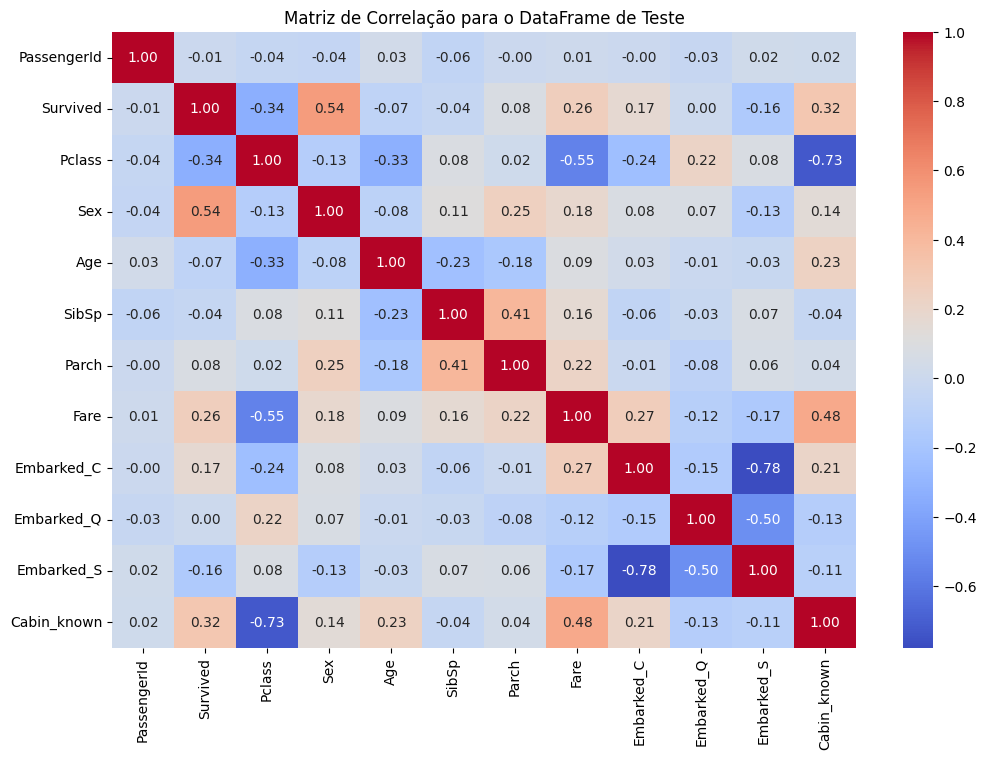

In [ ]:
correlation_matrix = train_df.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação para o DataFrame de Teste')
plt.show()

In [ ]:
variaveis = ['Sex', 'Cabin_known','Fare','Pclass']

# DUELO 1:

**Com o minimo de pré processamento**

In [ ]:
# Separando as variáveis dependentes (Y) e independentes (X) no conjunto de treino
X = train_df[variaveis]
y = train_df['Survived']

X_test = test_df[variaveis]

Notem que a base não tem o Y test, pois após realizarmos as predicões nós submetemos elas na competição para descobrir nossa pontuação!

**REGRESSÃO LOGÍSTICA:**

In [ ]:
# Criando o modelo de Regressão Logística
logistic_duelo1 = LogisticRegression(random_state=42)

In [ ]:
# Treinando o modelo de Regressão Logística com os dados de treino
logistic_duelo1.fit(X, y)

LogisticRegression(random_state=42)

In [ ]:
# Fazendo previsões com o modelo treinado nos dados de treino
Y_logistic_duelo1 = logistic_duelo1.predict(X)

In [ ]:
relatorio = classification_report(y, Y_logistic_duelo1)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       549
           1       0.73      0.69      0.71       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



In [ ]:
Y_1 = logistic_duelo1.predict(X_test)

In [ ]:
Y_1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
sub = pd.Series(Y_1, index=test_df['PassengerId'], name = 'Survived')

In [ ]:
sub

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
sub.to_csv("teste.csv" , header=True)

**ARVORE DE DECISÃO:**

In [ ]:
# Criando o modelo da Arvore
arvore_duelo1 = DecisionTreeClassifier(random_state=42)

In [ ]:
# Treinando o modelo de Arvore com os dados de treino
arvore_duelo1.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Fazendo previsões com o modelo treinado nos dados de treino
Y_arvore_duelo1 = arvore_duelo1.predict(X)

In [ ]:
relatorio = classification_report(y, Y_arvore_duelo1)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       549
           1       0.92      0.84      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891



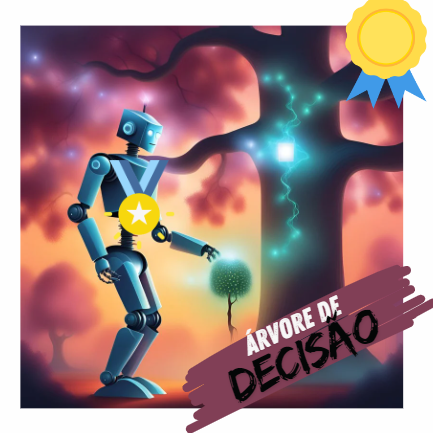

Os resultados que obtivemos são bastante comuns em cenários onde o modelo de Árvore de Decisão pode superestimar seu desempenho nos dados de treino devido à sua capacidade de se ajustar perfeitamente (overfitting) aos dados. A Regressão Logística, por outro lado, tende a ser mais robusta e pode não se ajustar tão perfeitamente aos dados de treino, resultando em uma acurácia menor.

Nós só saberemos o verdadeiro campeão após melhorarmos mais ainda os dados da regressão e submetermos os dados de teste para avaliação!

# DUELO 2:

**Padronizando e Balanceando**

In [ ]:
# Balanceando os dados com SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X, y)

In [ ]:
# Padronizando os dados
scaler = StandardScaler()
# Ajustando e transformando os dados de treino balanceados
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
#Aqui você pode selecionar apenas as colunas numéricas que serão escalonadas
# X_test_to_scale = X_test.drop(columns=['PassengerId'])
# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(f"Tamanho do conjunto de treino balanceado: {X_train_balanced_scaled.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test_scaled.shape[0]}")

Tamanho do conjunto de treino balanceado: 1098
Tamanho do conjunto de teste: 418


In [ ]:
print("Distribuição das classes antes do balanceamento:")
print(y.value_counts())

Distribuição das classes antes do balanceamento:
Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
print("\nDistribuição das classes depois do balanceamento:")
print(Y_train_balanced.value_counts())


Distribuição das classes depois do balanceamento:
Survived
0    549
1    549
Name: count, dtype: int64


**REGRESSÃO LOGÍSTICA:**

In [ ]:
logistic_duelo2 = LogisticRegression(random_state=42)

In [ ]:
logistic_duelo2.fit(X_train_balanced_scaled, Y_train_balanced)

LogisticRegression(random_state=42)

In [ ]:
Y_logistic_duelo2 = logistic_duelo2.predict(X_train_balanced_scaled)

In [ ]:
relatorio = classification_report(Y_train_balanced, Y_logistic_duelo2)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       549
           1       0.76      0.79      0.78       549

    accuracy                           0.77      1098
   macro avg       0.77      0.77      0.77      1098
weighted avg       0.77      0.77      0.77      1098



**ARVORE DE DECISÃO:**

In [ ]:
arvore_duelo2 = DecisionTreeClassifier(random_state=42)

In [ ]:
arvore_duelo2.fit(X_train_balanced_scaled, Y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_arvore_duelo2 = arvore_duelo2.predict(X_train_balanced_scaled)

In [ ]:
relatorio = classification_report(Y_train_balanced, Y_arvore_duelo2)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.94      0.89      0.91       549

    accuracy                           0.92      1098
   macro avg       0.92      0.92      0.92      1098
weighted avg       0.92      0.92      0.92      1098



Os resultados dos modelos melhoraram após a padronização e balanceamento dos dados. Essas etapas são cruciais para garantir que os modelos de machine learning funcionem corretamente e de maneira justa.

A melhora maior da Regressão Logística em comparação à Árvore de Decisão após o balanceamento e padronização dos dados pode ser explicada por várias razões, que se relacionam com as características intrínsecas de cada algoritmo e como eles lidam com os dados.


# Vamos relembrar:
**Sensibilidade à Escala dos Dados:**
A Regressão Logística é sensível à escala dos dados porque ela calcula probabilidades baseadas em uma combinação linear das variáveis de entrada. A padronização coloca todas as variáveis na mesma escala, o que ajuda o modelo a convergir melhor e a fazer previsões mais precisas.

**Dependência da Distribuição dos Dados:**
A Regressão Logística assume uma relação linear entre as variáveis independentes e a variável dependente. O balanceamento dos dados ajuda a melhorar essa relação, tornando o modelo mais robusto e menos enviesado.

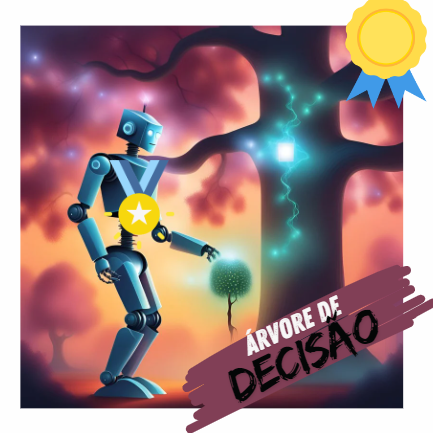

**NÃO SE ESQUEÇAM QUE AINDA NÃO ATRIBUIMOS O MODELO A BASE DE TESTE ENTÃO A REGRESSÃO AINDA PODE GANHAR!**

# DUELO FINAL:

**Tunando os modelos**

**REGRESSÃO LOGÍSTICA:**

Como uma última carta na manga para nosso modelo de regressão nós iremos aplicar um Grid Search, mas o que seria?

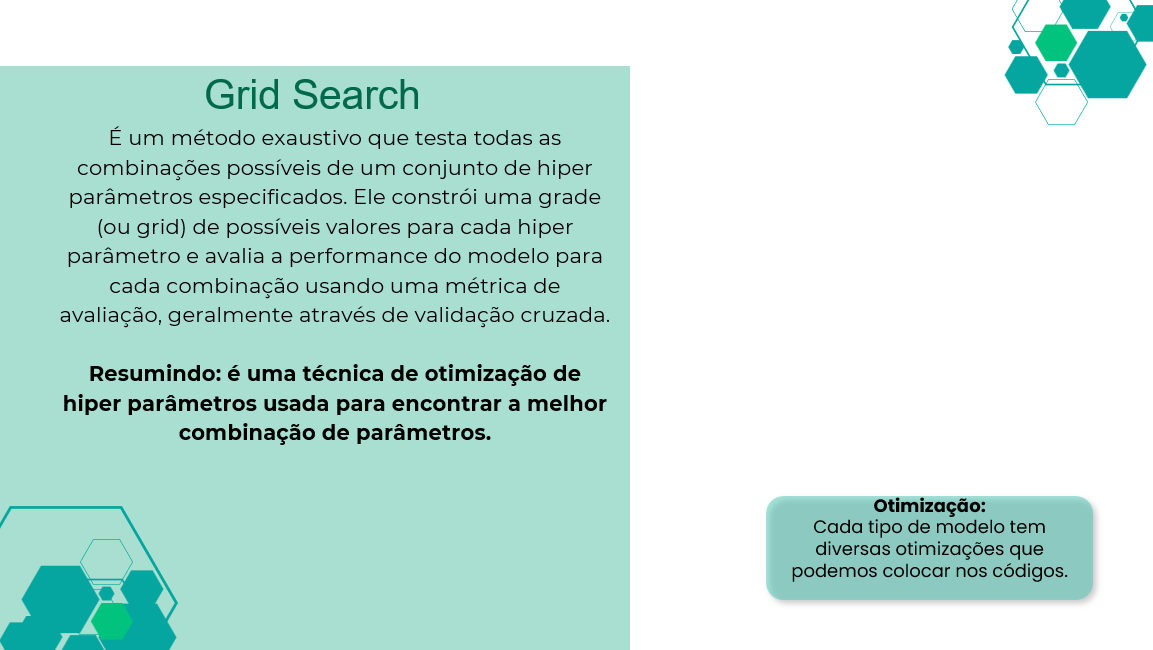

# Hiperparâmetros para Ajuste:

**C:** Parâmetro de regularização. Inverso da força da regularização; menor valor especifica regularização mais forte.

**penalty:** Tipo de penalidade a ser usada ('l1', 'l2', 'elasticnet', 'none').

**solver:** Algoritmo de otimização ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga').

**C: Parâmetro de Regularização**

O que é: Imagine que você está tentando ajustar um elástico para caber perfeitamente em torno de um objeto. O parâmetro C é como a rigidez do elástico.

Como funciona: Se C for um número pequeno, o elástico é muito rígido e não se ajusta tão bem ao objeto (mais regularização). Se C for um número grande, o elástico é mais solto e se ajusta muito bem ao objeto (menos regularização).

Por que é importante: Um elástico muito solto (alto C) pode se ajustar tão bem que pode até capturar imperfeições, enquanto um elástico muito rígido (baixo C) pode não se ajustar bem o suficiente.

**penalty: Tipo de Penalidade**

O que é: Pense em como você gostaria de corrigir ou penalizar um comportamento incorreto.

L1: Penaliza de uma forma que pode fazer com que alguns comportamentos indesejados sejam completamente eliminados.

L2: Penaliza de uma forma que suaviza todos os comportamentos indesejados, sem eliminá-los completamente.

ElasticNet: Combina os dois tipos de penalidade anteriores.

None: Não aplica nenhuma penalidade.

Como funciona: Imagine que você tem um jardim e algumas plantas estão crescendo de maneira desordenada. A penalidade L1 cortaria algumas dessas plantas completamente (resultando em um jardim mais limpo), enquanto a L2 as podaria para que todas crescessem de forma mais controlada, mas nenhuma fosse cortada completamente.

Por que é importante: Diferentes tipos de penalidade ajudam a controlar a complexidade do modelo e a evitar que ele se ajuste demais aos dados (overfitting).

**solver: Algoritmo de Otimização**

O que é: Pense no solver como a ferramenta ou o método que você usa para resolver um quebra-cabeça.

Como funciona: Existem diferentes ferramentas (solvers) que você pode usar:

newton-cg: Ferramenta que usa um método baseado em cálculos de segunda ordem.

lbfgs: Outra ferramenta eficiente para grandes problemas.

liblinear: Boa para conjuntos de dados pequenos a médios.

sag e saga: Ferramentas boas para grandes conjuntos de dados.

Por que é importante: Cada ferramenta tem suas próprias vantagens e desvantagens dependendo do tipo e do tamanho do problema que você está tentando resolver. Escolher a ferramenta certa pode tornar o processo de ajuste do modelo mais eficiente e preciso.

**C:** Ajusta a rigidez de como o modelo se encaixa nos dados. Número pequeno = mais rígido, número grande = mais solto.

**penalty:**Decide como corrigir o ajuste. L1 corta algumas coisas completamente, L2 apenas poda tudo um pouco.

**solver:** Escolhe a melhor ferramenta para resolver o problema de ajuste do modelo. Diferentes ferramentas funcionam melhor em diferentes situações.

# Teremos um módulo apenas para falar de otmização de modelos e nos aprofundaremos mais nos tipos de otimizações!

In [ ]:
# Criando o modelo de Regressão Logística
logistic_duelo3 = LogisticRegression(random_state=42, max_iter=10000)

In [ ]:
# 2. Especificar os hiperparâmetros e seus valores
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'penalty': ['l1', 'l2'],  # Tipo de penalidade
    'solver': ['liblinear', 'saga']  # Algoritmo de otimização adequado para L1 e L2
}

In [ ]:
# Aplicando o Grid Search com validação cruzada
grid_search = GridSearchCV(logistic_duelo3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced_scaled, Y_train_balanced)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

param_grid: Este é o dicionário que contém os hiperparâmetros que queremos ajustar e os valores que queremos testar para cada um. Por exemplo, pode ser algo como {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}.

cv=5: Isso especifica o número de folds a serem usados na validação cruzada. cv=5 significa que os dados serão divididos em 5 partes, e o modelo será treinado 5 vezes.

scoring='accuracy': Este parâmetro define a métrica de avaliação usada para determinar a qualidade das combinações de hiperparâmetros.

n_jobs=-1: Este parâmetro especifica quantos processadores serão usados para executar a busca em grade. n_jobs=-1 significa que todos os processadores disponíveis no sistema serão utilizados, o que pode acelerar significativamente o processo.

In [ ]:
# Melhores parâmetros encontrados
best_params = grid_search.best_params_
print(f"Melhores parâmetros: {best_params}")

Melhores parâmetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Melhor modelo
best_logistic_model = grid_search.best_estimator_

In [ ]:
accuracy_train = best_logistic_model.score(X_train_balanced_scaled, Y_train_balanced)
print(f"Acurácia do melhor modelo nos dados de treino: {accuracy_train:.4f}")

Acurácia do melhor modelo nos dados de treino: 0.7696


In [ ]:
# Fazendo previsões nos dados de treino
Y_pred_grid = best_logistic_model.predict(X_train_balanced_scaled)

# Gerarando o relatório de métricas
report_grid = classification_report(Y_train_balanced, Y_pred_grid)
print("Relatório de Métricas - Modelo com Grid Search:\n", report_grid)

Relatório de Métricas - Modelo com Grid Search:
               precision    recall  f1-score   support

           0       0.78      0.75      0.76       549
           1       0.76      0.79      0.77       549

    accuracy                           0.77      1098
   macro avg       0.77      0.77      0.77      1098
weighted avg       0.77      0.77      0.77      1098



Quando você usa o Grid Search, o modelo é ajustado usando validação cruzada, o que geralmente resulta em um modelo que generaliza melhor para dados novos, em vez de apenas se ajustar bem aos dados de treino.

Vamos agora rodar o modelo para os dados de teste, salvar as previsões e submeter na competição.

In [ ]:
Y_pred_logistica = best_logistic_model.predict(X_test_scaled)

In [ ]:
Y_pred_logistica

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
sub_logistic = pd.Series(Y_pred_logistica, index=test_df['PassengerId'], name = 'Survived')

In [ ]:
sub_logistic

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
sub_logistic.to_csv("submissao_logistic.csv" , header=True)

**Avorde de Decisão:**

In [ ]:
arvore_duelo3 = DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critério de divisão
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidade máxima da árvore
    'min_samples_split': [2, 10, 20],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 5, 10],  # Número mínimo de amostras em um nó folha
}

In [ ]:
#Configurando o Grid Search
grid_search_arvore = GridSearchCV(arvore_duelo3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#Ajustando o Grid Search aos dados de treino
grid_search_arvore.fit(X_train_balanced_scaled, Y_train_balanced)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [ ]:
# Melhores parâmetros encontrados
best_params_arvore = grid_search_arvore.best_params_
print(f"Melhores parâmetros: {best_params_arvore}")

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#Melhor modelo
best_arvore_model = grid_search_arvore.best_estimator_

In [ ]:
Y_pred_arvore = best_arvore_model.predict(X_train_balanced_scaled)
report_arvore = classification_report(Y_train_balanced, Y_pred_arvore)
print("Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):\n", report_arvore)

Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.94      0.89      0.91       549

    accuracy                           0.92      1098
   macro avg       0.92      0.92      0.92      1098
weighted avg       0.92      0.92      0.92      1098



In [ ]:
Y_pred_tree = best_arvore_model.predict(X_test_scaled)

In [ ]:
Y_pred_tree

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
sub_tree = pd.Series(Y_pred_tree, index=test_df['PassengerId'], name = 'Survived')

In [ ]:
sub_tree

PassengerId
892     0
893     1
894     1
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
sub_tree.to_csv("submissao_tree.csv" , header=True)